In [6]:
##IGNORE THIS FILE - GO TO testingAHRS.ipynb

from pyquaternion import Quaternion
import numpy as np
#import matplotlib
#matplotlib.use('TKAgg')

from matplotlib import pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D


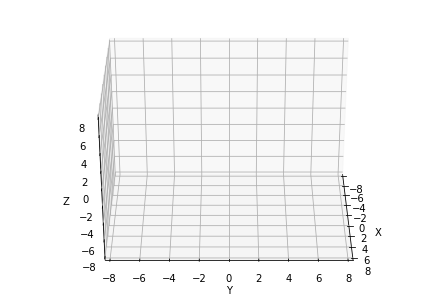

In [7]:

def generate_quaternion():
	q1 = Quaternion.random()
	q2 = Quaternion.random()
	while True:
		for q in Quaternion.intermediates(q1, q2, 20, include_endpoints=True):
			yield q
		#q1, q2 = q2, q1
		q1 = q2
		q2 = Quaternion.random()

quaternion_generator = generate_quaternion()

# Set up figure & 3D axis for animation
fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1], projection='3d')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
#ax.axis('off')

# use a different color for each axis
colors = ['r', 'g', 'b']

# set up lines and points
lines = sum([ax.plot([], [], [], c=c)
             for c in colors], [])

startpoints = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 0]])
endpoints = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])

# prepare the axes limits
ax.set_xlim((-8, 8))
ax.set_ylim((-8, 8))
ax.set_zlim((-8, 8))

# set point-of-view: specified by (altitude degrees, azimuth degrees)
ax.view_init(30, 0)


# initialization function: plot the background of each frame
def init():
    for line in lines:
        line.set_data([], [])
        line.set_3d_properties([])

    return lines

# animation function.  This will be called sequentially with the frame number
def animate(i):
    # we'll step two time-steps per frame.  This leads to nice results.
    #i = (2 * i) % x_t.shape[1]

    q = next(quaternion_generator)
    #print("q:", q)

    for line, start, end in zip(lines, startpoints, endpoints):
        #end *= 5
        start = q.rotate(start)
        end = q.rotate(end)

        line.set_data([start[0], end[0]], [start[1], end[1]])
        line.set_3d_properties([start[2], end[2]])

        #pt.set_data(x[-1:], y[-1:])
        #pt.set_3d_properties(z[-1:])

    #ax.view_init(30, 0.6 * i)
    fig.canvas.draw()
    return lines

# instantiate the animator.
anim = animation.FuncAnimation(fig, animate, init_func=init,
                               frames=500, interval=30, blit=False)

# Save as mp4. This requires mplayer or ffmpeg to be installed
#anim.save('lorentz_attractor.mp4', fps=15, extra_args=['-vcodec', 'libx264'])

plt.show()